In [18]:
import numpy as np
import pandas as pd
df=pd.read_csv("netflix_titles.csv")
head=df.head()
print(head)
df.info()
# checking misssing values
missing_values=df.isnull().sum()
print(missing_values)

## Data Cleaning
df['director']=df['director'].fillna('unknown')
df['cast']=df['cast'].fillna('unknown')
df['country']=df['country'].fillna('unknown')
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df=df.dropna(subset=['date_added'])
df=df.dropna(subset=['duration'])

# Rechceking for missing values
missing_values=df.isnull().sum()
print(missing_values)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

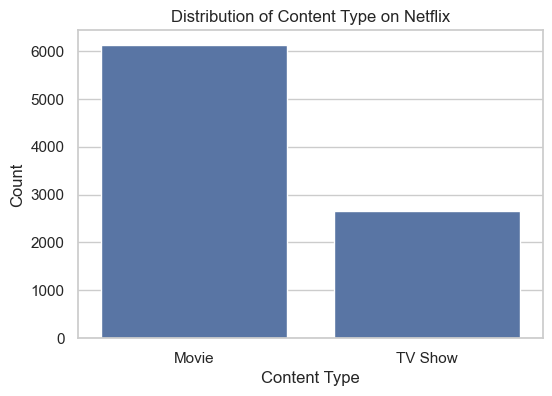

In [36]:
# Exploratory Data Analysis & Visualization
## Chart 1: Count Plot (Content Type)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()



### Chart 1: Distribution of Content Type

**INSIGHTS:**
- Movies are significantly more than TV shows on Netflix.
- Netflix focuses more on movie content compared to series.
  


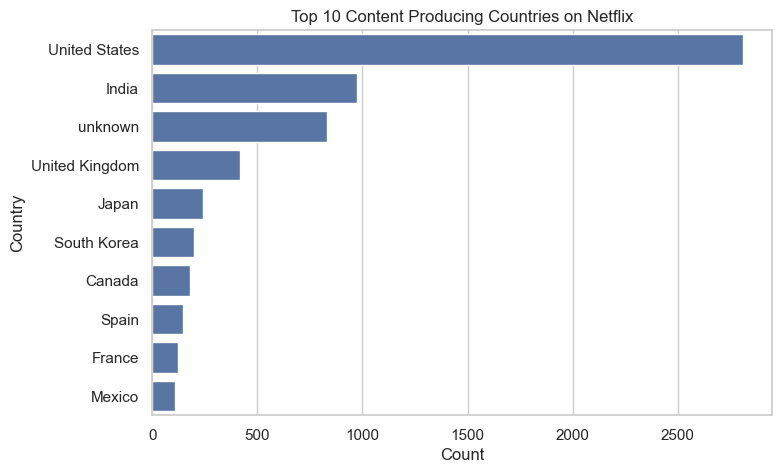

In [35]:
## Chart 2: Bar Chart (Top 10 Countries)
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### Chart 2: Top 10 Content-Producing Countries

**INSIGHTS:**

- The United States is the largest content producer on Netflix.

- India ranks among the top contributors, indicating strong growth in regional and international content.

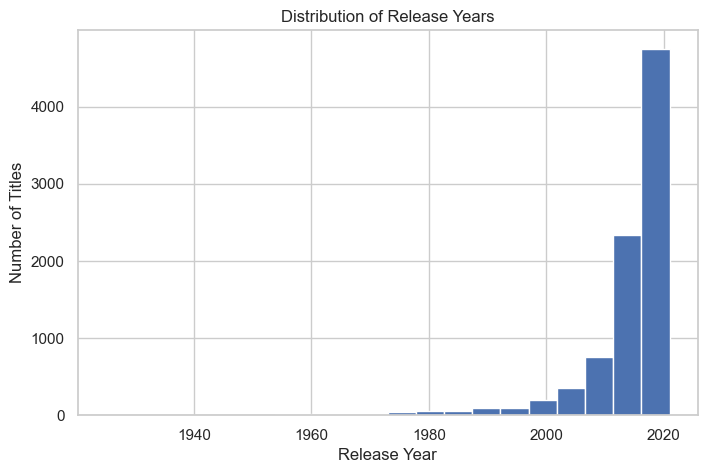

In [34]:
## Chart 3: Histogram (Release Year)
plt.figure(figsize=(8,5))
plt.hist(df['release_year'], bins=20)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


### Chart 3: Distribution of Release Years (Histogram)

**INSIGHTS:**

- Most Netflix content has been released after 2010.

- This indicates Netflix’s focus on modern and recent entertainment content.

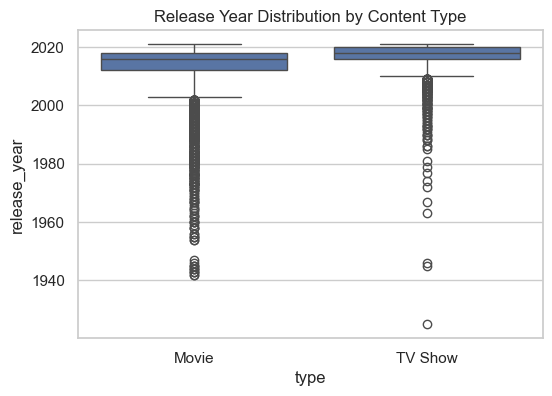

In [33]:
## Chart 4: Release Year by Content Type (Box Plot)
plt.figure(figsize=(6,4))
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Release Year Distribution by Content Type')
plt.show()


### Chart 4: Release Year by Content Type (Box Plot)

**INSIGHTS:**

- TV shows generally have more recent release years compared to movies.

- Movies show a wider spread in release years, including older titles.

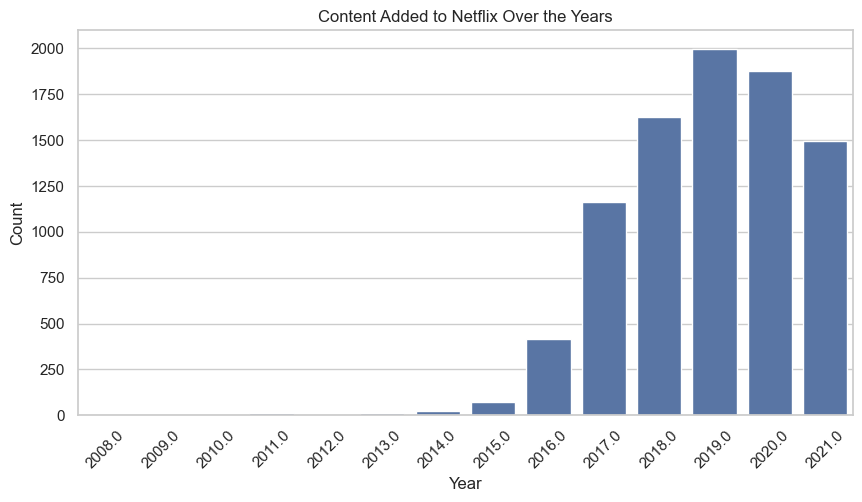

In [32]:
## Chart 5: Line / Count Plot (Content Added Over Years)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

year_order = sorted(df['year_added'].dropna().unique())

plt.figure(figsize=(10,5))
sns.countplot(x='year_added', data=df, order=year_order)
plt.xticks(rotation=45)
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


### Chart 5: Content Added to Netflix Over the Years (Trend Chart)

**INSIGHTS:**

- Netflix content additions increased rapidly after 2016.

- The platform experienced peak growth in content addition around 2019–2020.

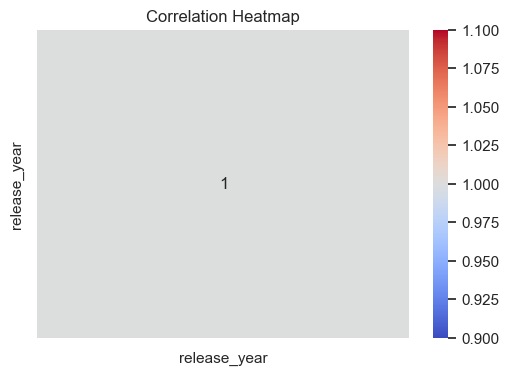

In [20]:
## Chart 6: Heatmap (Correlation)
plt.figure(figsize=(6,4))
sns.heatmap(df[['release_year']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Chart 6: Correlation Heatmap

**INSIGHTS:**

- Only one numerical feature (release year) is present, showing limited correlation analysis.

- Most insights in this dataset are driven by categorical variables rather than numerical relationships.

### Overall Insights
- Netflix content is dominated by movies.
- The platform focuses on recent releases.
- The United States and India are major content contributors.

### Conclusion
This project analyzed Netflix content using Python EDA techniques.
The analysis revealed trends in content type, release patterns, and regional dominance.
Such insights can support content strategy and business decisions.
